In [1]:
# Import all required packages

from scipy.ndimage.filters import convolve
from numpy import interp
import cv2
import numpy as np
import matplotlib.pyplot as plot
import math

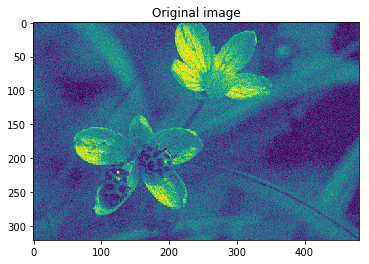

In [402]:
# Read original image

original_img = cv2.imread("flower.jpg", 0)
plot.title("Original image")
plot.imshow(original_img)
plot.show()

## Question 1

In [272]:
# nxn mean filtering

def mean_filtering(img, filter_size):
    
    for row in range(len(img)-filter_size-1):
        for column in range(len(img[0])-filter_size-1):
            
            # Take an nxn submatrix inside the image
            matrx = img[row:row+filter_size, column:column+filter_size]

            intensity_values = []
            lis = matrx.tolist()

            for element in lis:
                intensity_values += element
            
            # Calculate the mean of pixel values
            mean = sum(intensity_values)/len(intensity_values)
            
            img[row+int((filter_size-1)/2), column+int((filter_size-1)/2)] = mean
    return img

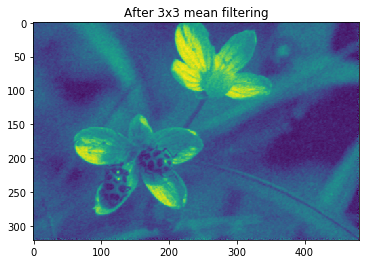

In [403]:
# 3x3 filtering

img = mean_filtering(original_img, 3)
plot.title("After 3x3 mean filtering")
plot.imshow(img)
plot.show()

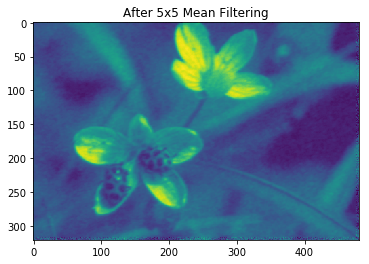

In [398]:
# 5x5 filtering

img_2 = cv2.imread("flower.jpg", 0)

res_5 = mean_filtering(img_2, 5)

plot.title("After 5x5 Mean Filtering")
plot.imshow(res_5)
plot.show()

## Question 2

In [355]:
# Initialize sobel operators for edge detection

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])

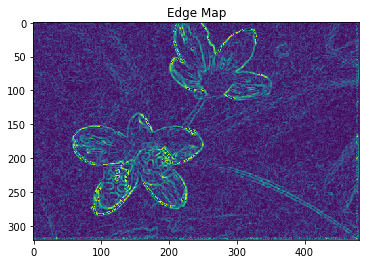

In [404]:

# Initialize dx and dy
dx = np.zeros((len(img), len(img[0])))
dy = np.zeros((len(img), len(img[0])))
theta = np.zeros((len(img), len(img[0])))

for x in range(len(img)-2):
    for y in range(len(img[0])-2):
        
        # Calculate dx and dy by multiplying with sobel operators along x and y axis
        gx = np.sum(np.multiply(img[x:x+3, y:y+3], sobel_x))
        
        dx[x,y] = gx
                
        gy = np.sum(np.multiply(img[x:x+3, y:y+3], sobel_y))                        
        dy[x,y] = gy
        
        # If gx is 0, tan value would be infinity, for which angle is 90 degrees
        if(gx == 0):
            angle = 90.0
        else:
            angle = math.degrees(math.atan(gy/gx))
        
        # Rescaling the range of values to intensity values from 0 to 255
        theta[x, y] = int(interp(angle,[-90, 90], [0, 255]))
        
        # Calculate magnitude of gradient
        img[x, y] = round(math.pow((math.pow(gx, 2) + math.pow(gy, 2)), 0.5))

# Display gradient image
plot.title("Edge Map")
plot.imshow(img)
plot.show()

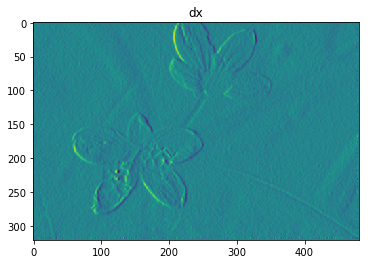

In [399]:
# Display horizontal gradient
plot.title("dx")
plot.imshow(dx)
plot.show()

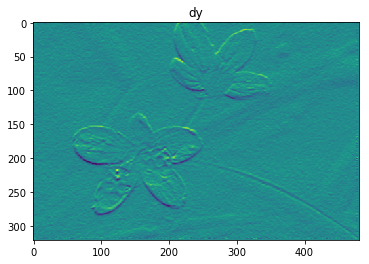

In [400]:
# Display vertical gradient
plot.title("dy")
plot.imshow(dy)
plot.show()

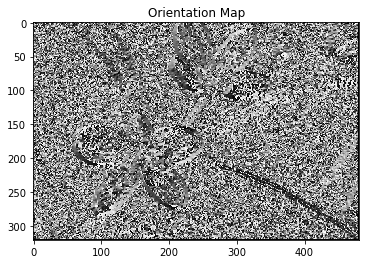

In [401]:
# Display theta matrix
plot.title("Orientation Map")
plot.imshow(theta, cmap="gray")
plot.show()

## Question 3

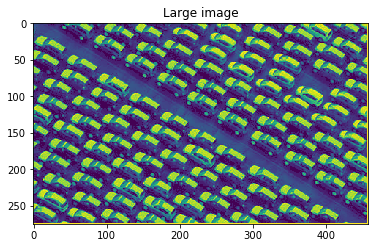

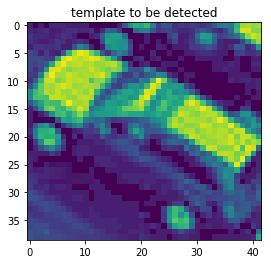

In [9]:
# Read the objects and template images
objects = cv2.imread("cars.png", 0)
template = cv2.imread("car.png", 0)

plot.title("Large image")
plot.imshow(objects)
plot.show()

plot.title("template to be detected")
plot.imshow(template)
plot.show()

# Initialize correlation image
correlation = np.zeros((len(objects) - len(template), len(objects[0]) - len(template[0])))

# Subtract mean of templateet image from all pixels
mean_template = np.mean(template)
sub_template = np.subtract(template, mean_template)       

for row in range(len(objects)-len(template)):
    for column in range(len(objects[0])-len(template[0])):
        
        # submatrix of the image
        win = objects[row:row+len(template), column:column+len(template[0])]
        
        mean_win = np.mean(win)
        sub_win = np.subtract(win, mean_win)
        
        mean_template = np.mean(template)
        sub_template = np.subtract(template, mean_template)
        
        # Multiply the the 2 matrices
        mul = np.multiply(sub_win, sub_template)
        
        # Sum the products
        correlation[row, column] = np.sum(mul)
        
        # Normalize the correlation value
        correlation[row, column] = np.divide(correlation[row, column], (math.pow(np.sum(np.square(sub_win)), 0.5)*math.pow(np.sum(np.square(sub_template)), 0.5)))


In [10]:
intensities_corr = np.multiply(correlation, 255)

In [11]:
# Typecast to int for display purposes
intensities_corr = intensities_corr.astype(int)

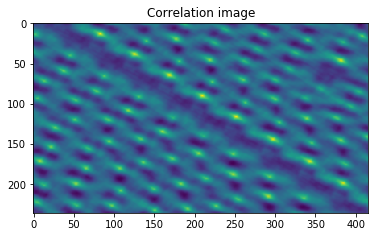

In [12]:
plot.title("Correlation image")
plot.imshow(intensities_corr)
plot.show()

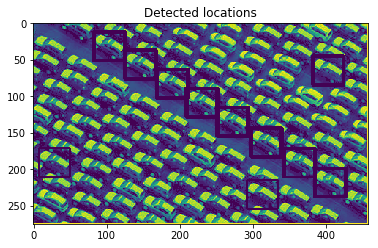

In [13]:
# Locate the co-odrinates where the correlation is greater than threshold

lo = np.where(intensities_corr>=0.8*255)
objects = cv2.imread("cars.png", 0)

# Draw a rectangle of the object size to determine the detected peak position
for values in range(len(lo[0])):
    cv2.rectangle(objects, (lo[1][values],lo[0][values]), (lo[1][values]+len(template[0]), lo[0][values]+len(template)),
                  (0,255,255), 2)


plot.title("Detected locations")
plot.imshow(objects)

plot.show()

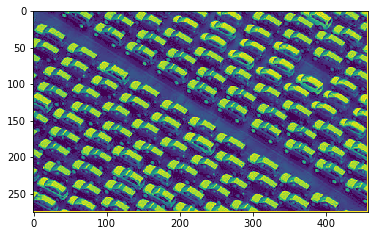

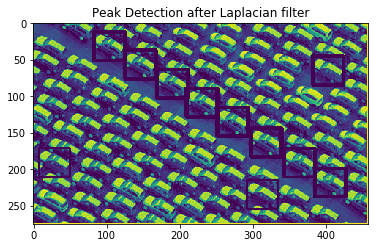

In [414]:
# Initialize Laplacian Filter
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

matrix = np.zeros((len(correlation)-2, len(correlation[0])-2))
template = cv2.imread("cars.png", 0)

plot.imshow(template)
plot.show()

# Convolve the correlation image using the Laplacian filter
for row in range(len(correlation)-2):
    for column in range(len(correlation[0])-2):
        matrix[row, column] = np.sum(np.multiply(correlation[row:row+3, column:column+3], laplacian))
        matrix[row, column] = 

matrix = np.multiply(matrix, 255).astype(int)
matrix = np.divide(matrix[row, column], (math.pow(np.sum(np.square(correlation[row:row+3, column:column+3])), 0.5)*math.pow(np.sum(np.square(laplacian)), 0.5)))

# Locate the position where correlation is above threshold
lo = np.where(matrix>=0.8*255)

for values in range(len(lo[0])):
    cv2.rectangle(template, (lo[1][values],lo[0][values]), (lo[1][values]+len(obj[0]), lo[0][values]+len(obj)), (0,255,255), 2)

plot.title("Peak Detection after Laplacian filter")
plot.imshow(template)
plot.show()